# Actividad Número 3, Técnicas Multivariantes.
## Máster en ingeniería matemática y computación.
## Jorge Augusto Balsells Orellana.

In [1]:
#!/usr/bin/python3

### Importación de librerías

In [2]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn as sk
import numpy as np
import pandas as pd
import graphviz 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score

### Creando dataset.
### Documento de identificación: 1663153890101 -> Modificado: 26632538

In [3]:
#DPI modificado
dpi = "26632538"

#Generación de dataset
DataSet = sk.datasets.make_classification(
    n_samples = 200 + 10*int(dpi[0]), 
    n_features = 10 + int(dpi[1]) + int(dpi[2]),
    n_informative = 10 + int(dpi[1]), 
    random_state = int(dpi),
    shuffle=False,

    n_redundant=2, 
    n_repeated=0, 
    n_classes=2, 
    n_clusters_per_class=2, 
    weights=None, 
    flip_y=0.01, 
    class_sep=1.0, 
    hypercube=True, 
    shift=0.0, 
    scale=1.0 
)

#Longitud de dataset
print("Length: " + str(len(DataSet)))

X = DataSet[0]
Y = DataSet[1]

#Shapes con el tamaño de los arrays involucrados en DataSet 
print("Generated Samples:" + str(X.shape))
print("Integer labels:" + str(Y.shape))
print("El conjunto de datos contiene "+str(X.shape[1])+" variables predictoras, con "+str(X.shape[0])+" muestras")

#Agregando nombres de columnas a DataSet
Features = ['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9','c10','c11','c12','c13','c14', 'c15','c16','c17','c18','c19','c20','c21']
Data = pd.DataFrame(DataSet[0], columns = Features)
print(Data) 

Length: 2
Generated Samples:(220, 22)
Integer labels:(220,)
El conjunto de datos contiene 22 variables predictoras, con 220 muestras
           c0        c1        c2        c3        c4        c5        c6  \
0   -0.623798  2.886848  2.289823  1.966687  5.857388  2.864425  1.240953   
1   -4.230493  2.574538 -1.888288  0.034745  0.474872 -3.073048 -3.280422   
2    2.403653 -0.138274  3.773707  2.264375  4.246538  0.156183  3.108223   
3   -2.314204 -2.136062  0.104248  2.047772 -0.883033 -4.931123 -1.713463   
4   -1.859431 -1.098524  0.552397  5.169887  1.383473 -1.257396  4.124868   
..        ...       ...       ...       ...       ...       ...       ...   
215 -4.483727 -2.943545  1.243704  3.460865  0.145977  1.130336 -1.093742   
216 -2.571963  3.924738  3.771498 -0.270276  1.586456  2.028533  4.302808   
217 -1.107106  2.239045 -2.226861 -0.669305 -2.780989  0.468113 -2.042945   
218 -3.406655  3.023067 -6.719494  2.827009 -0.320336 -2.108107 -3.761495   
219  4.003681 -0.878

### Divide el conjunto de datos en 200 observaciones para el entrenamiento y el resto para realizar la validación de los distintos métodos de regresión aplicados.

In [4]:
#Separacion de datos de entrenamiento y datos de prueba
TrainSet, TestSet = train_test_split(Data, test_size=0.09, random_state=42)
YTrain, YTest = train_test_split(Y, test_size=0.09, random_state=42)

#Mostrar shape de datos de entrenamiento
print("Datos de entrenamiento")
print(TrainSet.shape)
print(YTrain.shape)

#Mostrar shape de datos de prueba
print("Datos de prueba")
print(TestSet.shape)
print(YTest.shape)

Datos de entrenamiento
(200, 22)
(200,)
Datos de prueba
(20, 22)
(20,)


### Describe tu conjunto de datos (transfórmalo en un data.frame, aplica los métodos .info(), .describe() y obtén el histograma o diagrama de barras de todas las variables (predictoras y la variable respuesta).

In [5]:
TrainSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 189 to 102
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   c0      200 non-null    float64
 1   c1      200 non-null    float64
 2   c2      200 non-null    float64
 3   c3      200 non-null    float64
 4   c4      200 non-null    float64
 5   c5      200 non-null    float64
 6   c6      200 non-null    float64
 7   c7      200 non-null    float64
 8   c8      200 non-null    float64
 9   c9      200 non-null    float64
 10  c10     200 non-null    float64
 11  c11     200 non-null    float64
 12  c12     200 non-null    float64
 13  c13     200 non-null    float64
 14  c14     200 non-null    float64
 15  c15     200 non-null    float64
 16  c16     200 non-null    float64
 17  c17     200 non-null    float64
 18  c18     200 non-null    float64
 19  c19     200 non-null    float64
 20  c20     200 non-null    float64
 21  c21     200 non-null    float64
dtype

In [6]:
TrainSet.describe()

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,-0.704091,0.720671,-0.321631,0.728076,0.817680,-0.545805,-0.381539,-0.013848,-0.090832,-0.124847,...,0.341815,-0.772603,0.027777,-0.056464,-3.626522,-1.082637,-0.067145,-0.031876,-0.027911,0.055325
std,2.374237,2.313069,2.807653,2.581373,2.148528,2.303483,2.200018,2.764656,2.355375,2.662448,...,2.728096,2.303506,2.544115,2.641034,5.799857,5.468672,0.968266,1.054385,0.951471,1.033747
min,-7.219070,-4.926262,-7.056635,-6.387122,-4.329674,-7.129064,-5.911245,-7.316625,-6.528675,-7.193691,...,-6.874284,-6.921811,-5.682946,-8.346379,-21.167742,-14.961184,-2.228178,-2.753712,-2.500636,-2.886508
25%,-2.222519,-0.601004,-2.154710,-0.913317,-0.553274,-2.192671,-1.805663,-1.740198,-1.786658,-1.894179,...,-1.580786,-2.519280,-1.843186,-1.670472,-7.034478,-5.264901,-0.658488,-0.789839,-0.685702,-0.653257
50%,-0.569562,0.499173,-0.603888,0.773361,0.631153,-0.443027,-0.230165,-0.152530,-0.227420,-0.394961,...,0.382955,-0.869128,-0.073868,-0.238759,-3.734389,-0.830931,-0.109493,-0.131189,-0.011032,0.025438
75%,0.941912,1.892434,1.258851,2.495485,2.300333,0.697737,0.949454,1.724729,1.430562,1.639940,...,2.310996,0.624991,1.751848,1.936141,-0.313455,2.755951,0.594224,0.735761,0.636113,0.780903
max,4.990854,7.784950,8.644422,7.613113,6.213770,5.714544,6.296661,6.515889,5.646378,7.384637,...,8.899354,6.178711,7.142610,6.338418,14.213284,11.367014,2.957483,2.972162,2.419877,3.293263


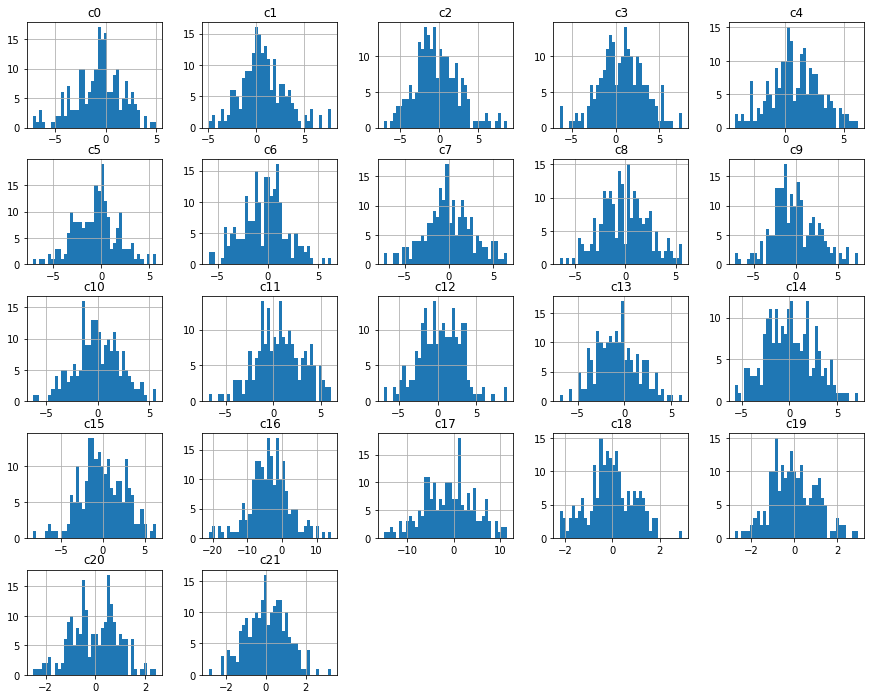

In [7]:
#40 barras, tamaño de 15x12
TrainSet.hist(bins=40,figsize=(15,12))
plt.title("variables predictoras")
plt.show()

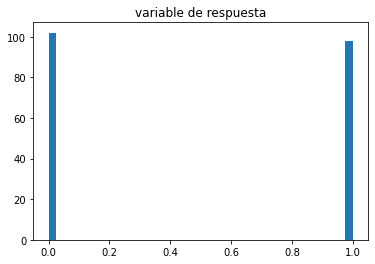

In [8]:
#Máximo de 40 barras
plt.hist(YTrain,bins=40)
plt.title("variable de respuesta")
plt.show()

### Obtén un modelo de clasificación mediante un árbol de decisión. Utiliza la función DecisionTreeClassifier de la librería scikit-learn utilizando los argumentos por defecto.

In [9]:
#Entrenamiento árbol de decisión
CLFDefault = DecisionTreeClassifier()
CLFDefault = CLFDefault.fit(TrainSet, YTrain)

YPred = CLFDefault.predict(TestSet)

AccuracyTreeDefault = accuracy_score(YPred, YTest)
AccuracyTreeDefault

0.75

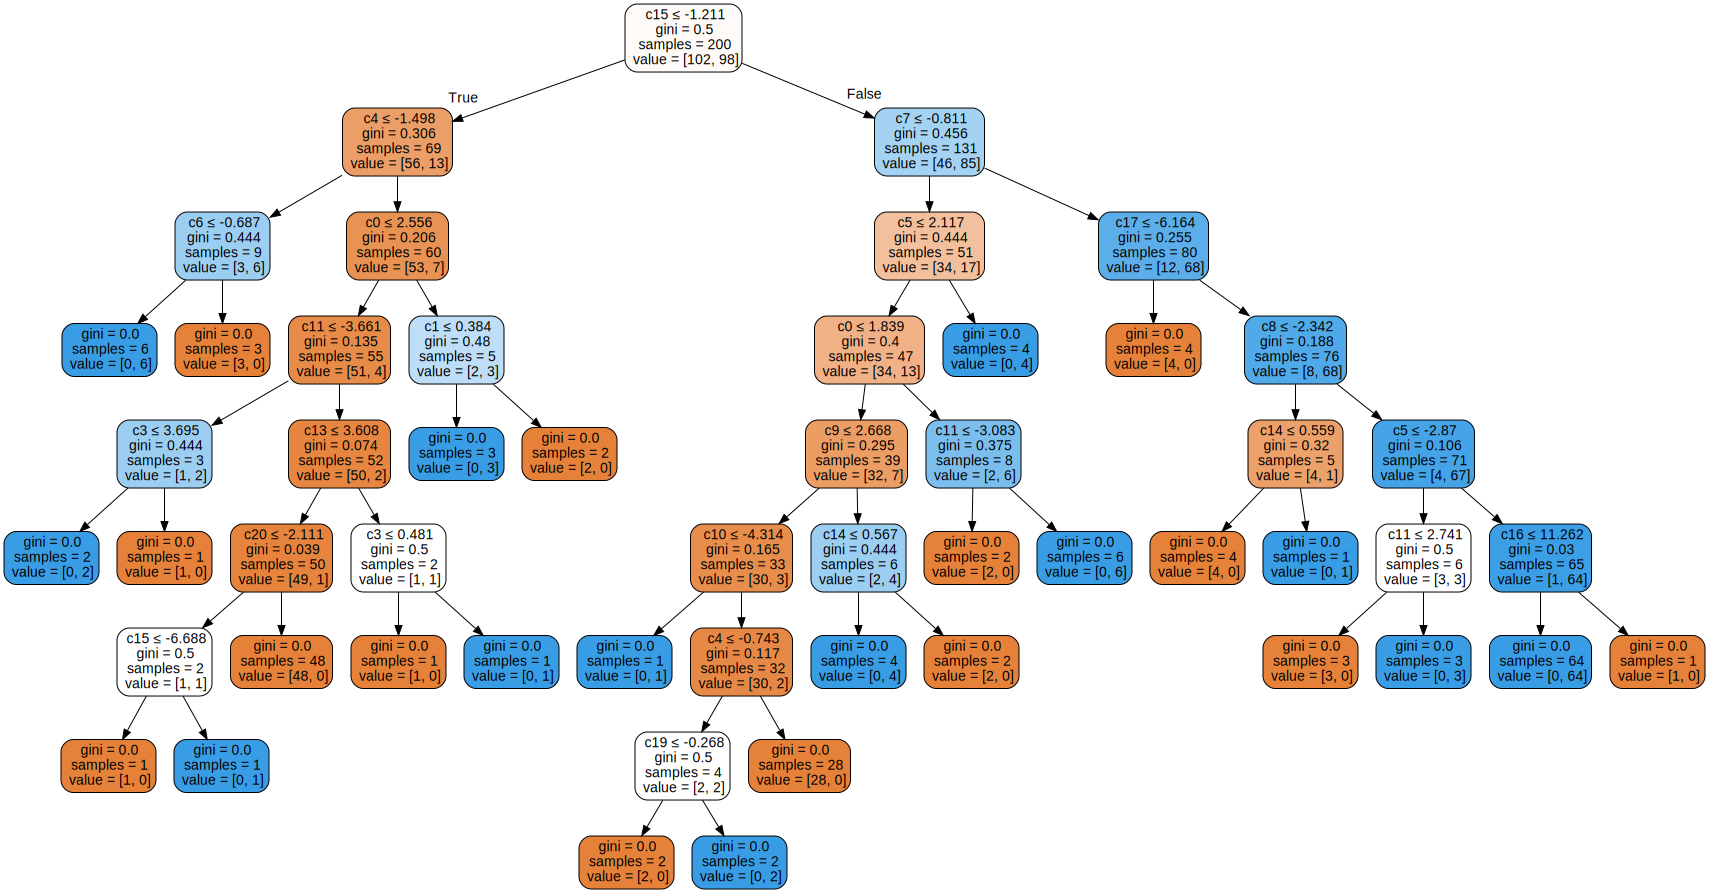

In [22]:
#Gráfico de árbol de decisión
DotData = export_graphviz(
    CLFDefault, 
    out_file=None, 
    feature_names=Features,  
    filled=True, 
    rounded=True,  
    special_characters=True
)  
Graph = graphviz.Source(DotData)  
Graph 

### Ahora indica que el nivel de profundidad máximo permitido es de 3. ¿Qué diferencias observas con el árbol anterior?

La principal diferencia es la profundidad que se le ha configurado, ya que el primero no tenía restricciones de profundidad. En este caso la profundidad máxima es de 3, lo cuál significa que, luego del nodo inicial, tenemos 3 niveles más en el árbol. Al ser un árbol binario, la máxima cantidad de nodos alcanzados en la última capa es de 8 nodos(2^n). Esto significa que el árbol original, solo es considerado hasta su tercera capa.

In [11]:
#Entrenamiento de árbol de decisión con un máximo de 3 niveles de profundidad
CLFMaxDepth3 = DecisionTreeClassifier(max_depth=3)
CLFMaxDepth3 = CLFMaxDepth3.fit(TrainSet, YTrain)

YPred = CLFMaxDepth3.predict(TestSet)

AccuracyMaxDepth3 = accuracy_score(YPred, YTest)
print(AccuracyMaxDepth3) 

0.8


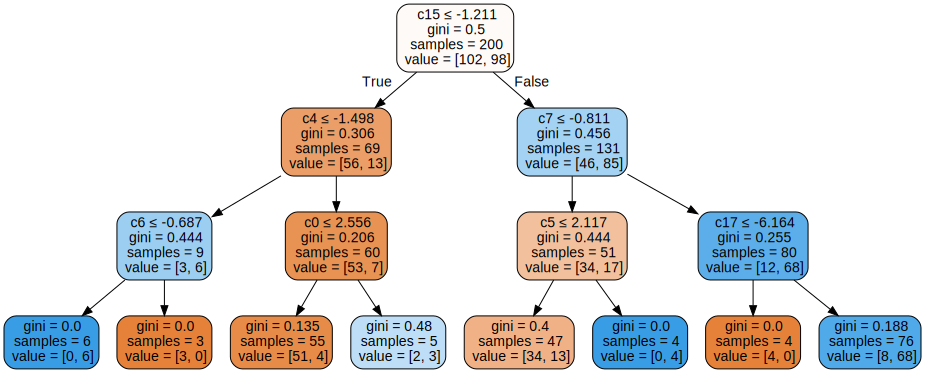

In [12]:
#Gráfico de árbol con un máximo de 3 niveles de profundidad
DotData = export_graphviz(
    CLFMaxDepth3, 
    out_file=None, 
    feature_names=Features,  
    filled=True, 
    rounded=True,  
    special_characters=True
)  
Graph = graphviz.Source(DotData)  
Graph 

### Realiza los siguientes modelos de ensamble:
- Con reemplazamiento (bagging).
- Sin reemplazamiento (pasting).
- Realizando Random Forest (fijando el número de nodos hoja máximo a 4).
- GBM.

#### ¿Cuál es mejor?

### Bagging, con reemplazamiento

In [13]:
CLFBag = BaggingClassifier(
    DecisionTreeClassifier(random_state = 3), 
    n_estimators = 100,
    max_samples = 70,
    bootstrap=True, 
    random_state = 3
)
CLFBag.fit(TrainSet, YTrain)

YPred = CLFBag.predict(TestSet)

AccuracyBagging = accuracy_score(YTest, YPred)
print(AccuracyBagging)

0.9


### Pasting, sin reemplazamiento

In [14]:
CLFPasting = BaggingClassifier(
    DecisionTreeClassifier(random_state = 3), 
    n_estimators = 100,
    max_samples = 70, 
    bootstrap=False,
    random_state = 3
)
CLFPasting.fit(TrainSet, YTrain)

YPred = CLFPasting.predict(TestSet)

AccuracyPasting = accuracy_score(YTest, YPred)
print(AccuracyPasting)

0.85


### Random forest

In [15]:
CLFRandomForest = RandomForestClassifier(
    n_estimators = 100, 
    max_leaf_nodes = 4, 
    random_state = 3, 
    max_samples = 70
)
CLFRandomForest.fit(TrainSet, YTrain)

YPred = CLFRandomForest.predict(TestSet)

AccuracyRandomForest = accuracy_score(YTest, YPred)
print(AccuracyRandomForest)

0.85


### GBM, Gradient Boosting Classifier

In [16]:
CLFGBM = GradientBoostingClassifier(
    n_estimators = 100,
    random_state = 3
)
CLFGBM.fit(TrainSet, YTrain)

YPred = CLFGBM.predict(TestSet)

AccuracyGBM = accuracy_score(YTest, YPred)
print(AccuracyGBM)

0.85


### Cuál método es mejor?

El mejor método es el más preciso, en este caso, el de mayor precisión es "Bagging". 

In [17]:
metrics = {
    'Model':['Bagging', 'Pasting', 'Random Forest', 'GBM'],
    'Accuracy': [AccuracyBagging, AccuracyPasting, AccuracyRandomForest, AccuracyGBM]
}

print(pd.DataFrame(metrics))

           Model  Accuracy
0        Bagging      0.90
1        Pasting      0.85
2  Random Forest      0.85
3            GBM      0.85


### Analiza la importancia de las variables de cada uno de estos métodos.

In [18]:
ModelsNames = ["DefaultTree", "Max Depth 3 Tree", "Bagging", "Pasting", "Random Forest", "GBM"]
Models = [CLFDefault, CLFMaxDepth3, CLFBag, CLFPasting, CLFRandomForest, CLFGBM]

importances = []
importances.append(CLFDefault.feature_importances_)
importances.append(CLFMaxDepth3.feature_importances_)

importances.append(
    np.mean([tree.feature_importances_ for tree in CLFBag.estimators_], 
    axis=0)
    )
importances.append(
    np.mean([tree.feature_importances_ for tree in CLFPasting.estimators_], 
    axis=0)
    )
importances.append(CLFRandomForest.feature_importances_)
importances.append(CLFGBM.feature_importances_)

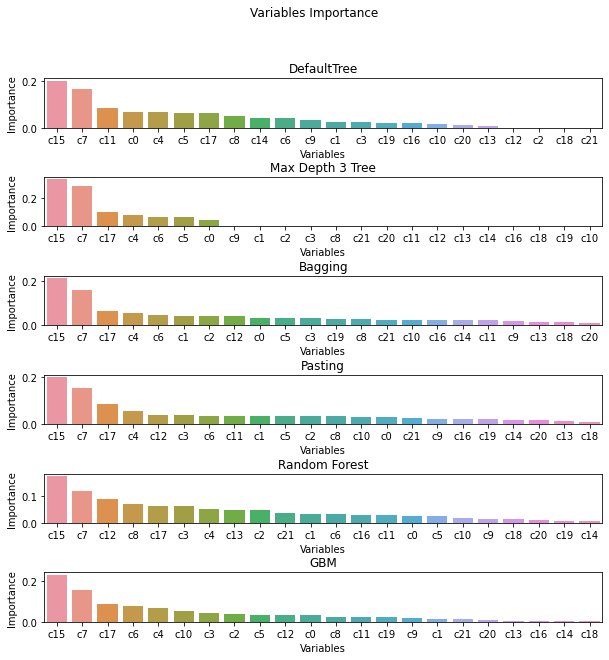

In [19]:
Features = np.array(Features)

fig, axs = plt.subplots(
    nrows=len(ModelsNames), 
    figsize=(10,10)
    )
fig.suptitle("Variables Importance")

for i,modelo in enumerate(Models):
    order_index = np.argsort(importances[i])[::-1]
    sns.barplot(
        x=Features[order_index],
        y=importances[i][order_index],
        ax=axs[i]
        )

    axs[i].set_title(ModelsNames[i])
    axs[i].set_xlabel("Variables")
    axs[i].set_ylabel("Importance")
    
plt.subplots_adjust(hspace=1)
plt.show() 